## Importing the libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer

## Importing the dataset

In [19]:
dataset=pd.read_csv('Train_cluster.csv')
df=dataset.drop(['ID','Segmentation'],axis=1)

# **Handling the Missing data**

In [20]:
# The imputation is now handled after one-hot encoding in cell iyQrz7fNpzAI
from sklearn.impute import SimpleImputer

missing=df.columns[df.isnull().any()].tolist()
print(missing)
numerical_cols = df[missing].select_dtypes(include=np.number).columns.tolist()
categorical_cols = df[missing].select_dtypes(exclude=np.number).columns.tolist()

imputer_mean = SimpleImputer(missing_values=np.nan,strategy='median')
df[numerical_cols] = imputer_mean.fit_transform(df[numerical_cols])

imputer_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df[categorical_cols] = imputer_mode.fit_transform(df[categorical_cols])

print(df.isnull().sum())

['Ever_Married', 'Graduated', 'Profession', 'Work_Experience', 'Family_Size', 'Var_1']
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64


# **Encoding Categorical data**

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X = np.array(ct.fit_transform(df))


print("One-hot encoding applied to categorical columns.")

One-hot encoding applied to categorical columns.


# **Using the dendrogram to find the optimal number of** **clusters**

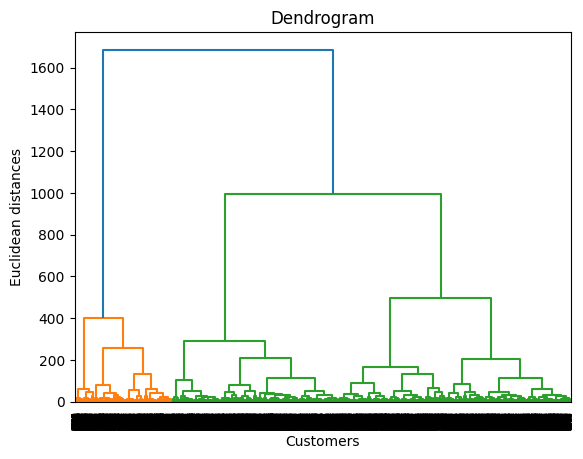

In [22]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# **Training the Hierarchial model on the dataset**

In [26]:

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4,  linkage = 'ward')
y_hc = hc.fit_predict(X)
print(y_hc)

[2 1 0 ... 2 2 1]


# **Displaying the results**

In [27]:

df['Cluster']=y_hc

print("Data for Cluster 0:")
display(df[df['Cluster'] == 0].head())

print("\nData for Cluster 1:")
display(df[df['Cluster'] == 1].head())

print("\nData for Cluster 2:")
display(df[df['Cluster'] == 2].head())

print("\nData for Cluster 3:")
display(df[df['Cluster'] == 3].head())

Data for Cluster 0:


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,0
8,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,0
13,Male,Yes,70,No,Lawyer,1.0,Low,1.0,Cat_6,0
14,Female,Yes,58,No,Doctor,0.0,Low,1.0,Cat_3,0



Data for Cluster 1:


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,1
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,1
15,Female,No,41,No,Healthcare,1.0,Low,2.0,Cat_1,1
23,Female,No,36,Yes,Artist,5.0,Low,2.0,Cat_6,1
28,Male,No,35,Yes,Artist,0.0,Low,1.0,Cat_6,1



Data for Cluster 2:


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,2
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,2
7,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,2
10,Female,No,26,Yes,Engineer,1.0,Low,3.0,Cat_6,2
11,Male,No,19,No,Healthcare,4.0,Low,4.0,Cat_4,2



Data for Cluster 3:


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Cluster
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,3
9,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,3
18,Male,Yes,58,Yes,Entertainment,1.0,Average,4.0,Cat_6,3
20,Male,Yes,49,Yes,Homemaker,12.0,Low,1.0,Cat_3,3
25,Male,Yes,56,No,Artist,1.0,Average,3.0,Cat_6,3


# **Testing**

In [29]:
# Load the new dataset
df_test = pd.read_csv('test_cluster.csv')
display(df_test.head())

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


# **Datapreprocessing**

In [30]:
# Preprocess the test data using the same transformers fitted on the training data

# Drop the 'Segmentation' column from df_test if it exists, as it's not needed for prediction and wasn't used in ct fitting on training data
if 'ID' in df_test.columns:
    df_test = df_test.drop('ID', axis=1)

# Handle missing values in df_test using the fitted imputers
missing_test = df_test.columns[df_test.isnull().any()].tolist()
numerical_cols_test = df_test[missing_test].select_dtypes(include=np.number).columns.tolist()
categorical_cols_test = df_test[missing_test].select_dtypes(exclude=np.number).columns.tolist()

# Use the already fitted imputer_mean and imputer_mode
if numerical_cols_test: # Check if the list is not empty
    df_test[numerical_cols_test] = imputer_mean.fit_transform(df_test[numerical_cols_test])

if categorical_cols_test: # Check if the list is not empty
    df_test[categorical_cols_test] = imputer_mode.fit_transform(df_test[categorical_cols_test])


print("Missing values in df_test after imputation:")
print(df_test.isnull().sum())

# Apply one-hot encoding to df_test using the already fitted ct
# Ensure the columns in df_test match the training columns used for fitting ct (excluding 'Segmentation')
# Get categorical column names as a list from df_test (excluding 'Segmentation' if it somehow exists)
categorical_cols_list_test = df_test.select_dtypes(include=['object']).columns.tolist()
if 'Segmentation' in categorical_cols_list_test:
     categorical_cols_list_test.remove('Segmentation')

# Apply the fitted ColumnTransformer
X_test = ct.transform(df_test)

# Convert sparse matrix to dense array if ct outputted a sparse matrix
if hasattr(X_test, 'toarray'):
    X_test = X_test.toarray()

print("\nShape of preprocessed test data (X_test):", X_test.shape)

Missing values in df_test after imputation:
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64

Shape of preprocessed test data (X_test): (2627, 28)


# **Predicting**

In [37]:
y_hc_test = hc.fit_predict(X_test)

print("Cluster predictions for the test data:")
print("First 10 predictions:", y_hc_test[:10])

Cluster predictions for the test data:
First 10 predictions: [0 0 1 1 2 0 1 0 0 2]


In [36]:
# Assuming your original test dataset had an 'ID' column before dropping it for preprocessing
# We need to load the original test dataset again to get the 'ID' column
df_test_original = pd.read_csv('test_cluster.csv')

# Create a submission DataFrame with 'ID' and predicted 'Cluster'
submission_df = pd.DataFrame({'ID': df_test_original['ID'], 'Segmentation': y_hc_test})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully!")
display(submission_df.head())

Submission file 'submission.csv' created successfully!


,ID,Segmentation
0,458989,0
1,458994,0
2,458996,1
3,459000,1
4,459001,2
